## Example 4: Plotting dV/dg

In this example we do something a bit more mathematical, and plot the partial derivative of the membrane potential V, with respect to the maximal conductance parameters `ina.gNa`, `ito.gto`, and `ical.gCaL`.

As in example 3 we load the model from a file, and then modify it so that `ito.gto` is a constant.

We then create a simulation, but this time passing in an extra argument `sensitivities`.
This contains a list of dependent (`y`) and independent (`x`) variables, and tells the simulation engine to log all derivatives of the independent variables with respect to the dependent variables (all `dy/dx`).

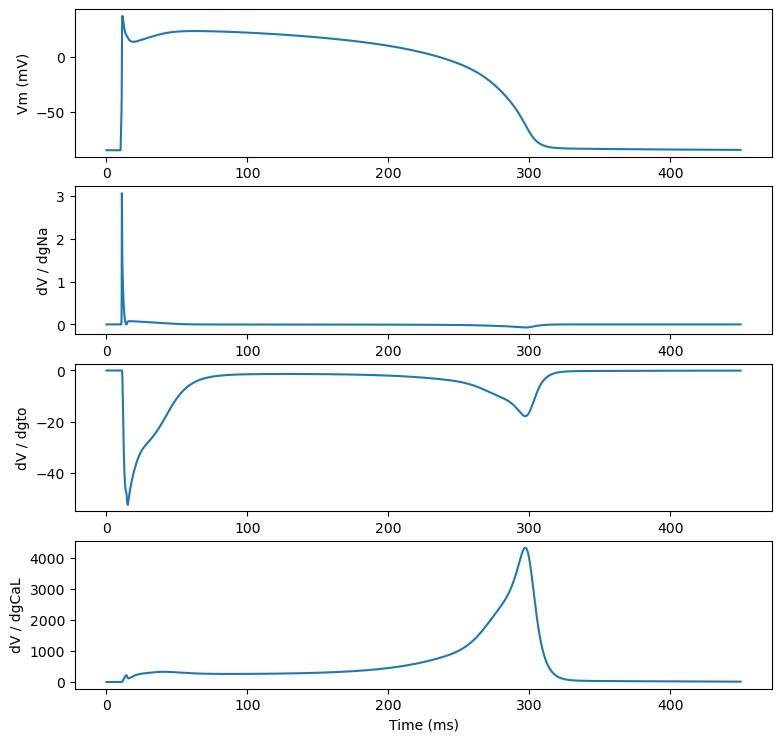

In [1]:
import myokit

# Load the model and protocol, discard the script
m, p, _ = myokit.load('models/c/tentusscher-2006.mmt')

# Update the model, turning ito.gto into a literal (not depending on any
# other variables).
m.get('ito.gto').set_rhs(0.3)

# Create a simulation that tracks selected dy/dx
variables = ['membrane.V']                        # The y-variables
parameters = ['ina.gNa', 'ito.gto', 'ical.gCaL']  # The x-variables
s = myokit.Simulation(m, p, sensitivities=(variables, parameters))

# Run the simulation
d, dp = s.run(450, log_interval=0.1)

# dp is now a list of matrices (represented as lists of lists!)
# Make this more usable by converting it to a numpy array:
import numpy as np
dp = np.array(dp)

# dp is now a numpy array containing the derivatives of each selected
# variable with respect to the selected parameters, over time.
# Values in this array are indexed as dp[t, x, p] where t is the index in
# time, x is the index of the dependent variable, and p is the index of
# the independent parameter.

# Display the results
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(9, 9), dpi=100)

ax = fig.add_subplot(4, 1, 1)
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Vm (mV)')
ax.plot(d['engine.time'], d['membrane.V'])

ax = fig.add_subplot(4, 1, 2)
ax.set_xlabel('Time (ms)')
ax.set_ylabel('dV / dgNa')
ax.plot(d['engine.time'], dp[:, 0, 0])

ax = fig.add_subplot(4, 1, 3)
ax.set_xlabel('Time (ms)')
ax.set_ylabel('dV / dgto')
ax.plot(d['engine.time'], dp[:, 0, 1])

ax = fig.add_subplot(4, 1, 4)
ax.set_xlabel('Time (ms)')
ax.set_ylabel('dV / dgCaL')
ax.plot(d['engine.time'], dp[:, 0, 2])

plt.show()

## Code changes in 2021

When the paper was published in 2016, the above example used a specialised simulation engine called a `PSimulation`.
In 2021 the ability to calculate derivatives was merged into the main simulation class (using the CVODES engine instead of the more primitive forward Euler method in PSimulation).
In 2023 the obsolete PSimulation class was removed.

The above example has been updated to work on the most recent versions of Myokit.